## Blood panel test 


## Read the data

And crop out the scale bar

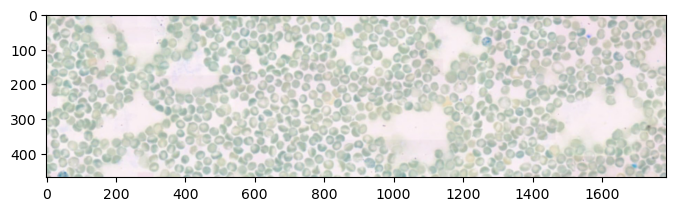

In [1]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d, imshow_multi2d
from skimage.filters import gaussian
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu, threshold_mean, threshold_triangle, threshold_yen
from tnia.segmentation.separate import separate_touching
from skimage.morphology import remove_small_objects
import numpy as np

from pathlib import Path

im_name = "cropped"

tnia_images_path = Path("D:/images/tnia-python-images")
parent_path = tnia_images_path / "imagesc/2024_04_15_blood_panel"
im = imread(str(parent_path / (im_name+".jpg")))
           
fig = imshow2d(im)


## Convert to HSV color space

And show the converted channels and histograms



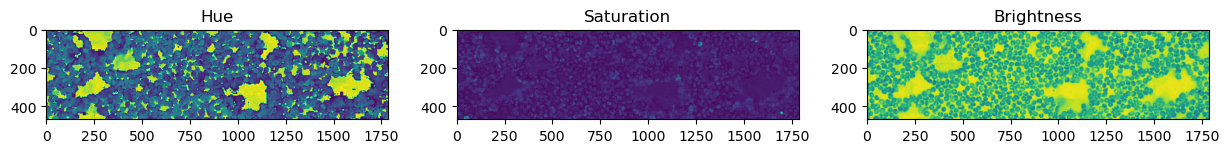

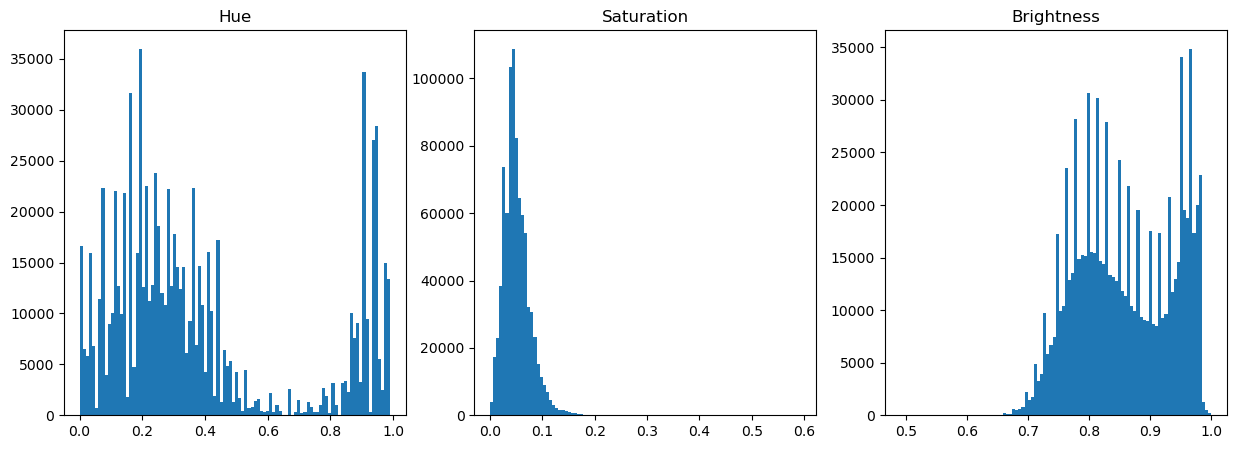

In [2]:
# convert to HSB
im_hsv = rgb2hsv(im)

fig = imshow_multi2d([im_hsv[:,:,0], im_hsv[:,:,1], im_hsv[:,:,2]], ['Hue', 'Saturation', 'Brightness'], 1, 3, width=15)

hists = []
for i in range(3):
    hists.append(np.histogram(im_hsv[:,:,i], bins=100))

fig = imshow_multi2d([im_hsv[:,:,0], im_hsv[:,:,1], im_hsv[:,:,2]], ['Hue', 'Saturation', 'Brightness'], 1, 3, width=15, height=5, plottypes=3*['hist'])



In [3]:
import napari

viewer = napari.Viewer()
viewer.add_image(im, name='RGB')
viewer.add_image(im_hsv[:,:,0], name='Hue')

<Image layer 'Hue' at 0x1ebbc9202e0>

## Threshold to create first guess for labels

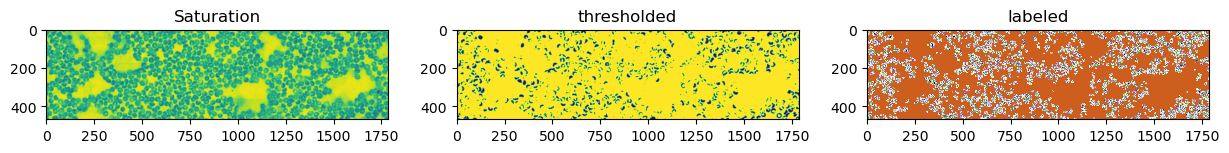

In [3]:
# apply guassian blur to hue
im_ = im_hsv[:,:,1] 

# apply otsu threshold
thresholded = im_ > threshold_otsu(im_)

from turtle import color
from skimage.measure import label
labeled = label(thresholded)

im_bright = im_hsv[:,:,2]

thresholded2 = im_bright > 0.75 #threshold_yen(im_bright[thresholded>0])

labeled = label(thresholded2)

# import random lable colormap
from tnia.plotting.plt_helper import random_label_cmap

fig = imshow_multi2d([im_bright, thresholded2, labeled], ['Saturation', 'thresholded','labeled'], 1, 3, width=15, colormaps=[None, None, random_label_cmap()])

In [36]:
import napari
viewer = napari.Viewer()
viewer.add_image(im, name='im')
viewer.add_image(im_hsv[:,:,2], name='brightness')
viewer.add_labels(thresholded2, name='thresholded')
#viewer.add_labels(labeled, name='labeled')

'''
viewer.add_image(im_hsv[:,:,0], name='hue')
viewer.add_image(im_hsv[:,:,1], name='saturation')
viewer.add_image(im_hsv[:,:,2], name='brightness')
viewer.add_labels(labeled, name='labeled')
'''

"\nviewer.add_image(im_hsv[:,:,0], name='hue')\nviewer.add_image(im_hsv[:,:,1], name='saturation')\nviewer.add_image(im_hsv[:,:,2], name='brightness')\nviewer.add_labels(labeled, name='labeled')\n"

In [37]:
from skimage.io import imsave

imsave(truth_path / (im_name+".tif"), thresholded)

C:\Users\bnort\AppData\Local\Temp\ipykernel_19600\1706900961.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_29_mosquito_cells\labels\ground truth\5.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave(truth_path / (im_name+".tif"), thresholded)
